# Figure and Subplots

The usual imports:

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We usually need a `Figure` with one or multiple `Axes` (subplots).

There are convenience functions to create both with one call.

## One plot - ``plt.subplots()``

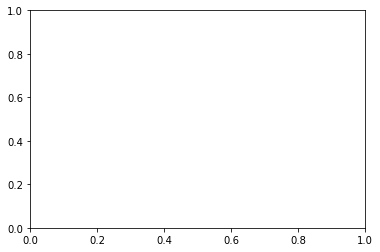

In [2]:
plt.subplots();

Returns a figure and an axes:

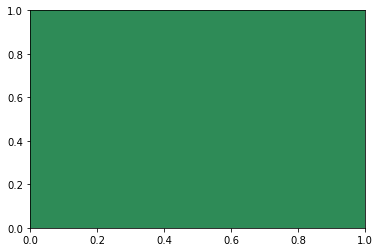

In [3]:
fig, ax = plt.subplots()
ax.set_facecolor('seagreen')

In [4]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


In [5]:
print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>


## A regular grid of plots - `plt.subplots(rows, columns)`

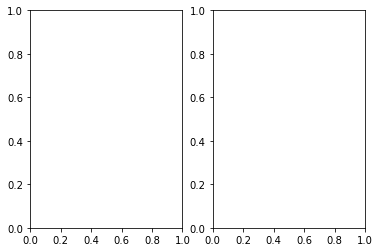

In [6]:
plt.subplots(1, 2);

Returns a `Figure` and a numpy array of `Axes`.

By default, this is squeezed, i.e. if *rows* or *columns* is 1, you get a 1D array.

<class 'numpy.ndarray'> (2,)


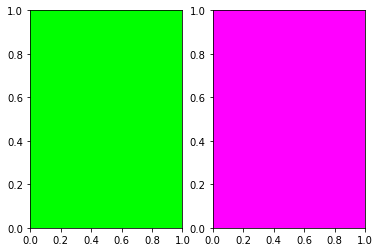

In [7]:
fig, axs = plt.subplots(1, 2)
print(type(axs), axs.shape)
axs[0].set_facecolor('lime')
axs[1].set_facecolor('fuchsia')

The return value of `plt.subplots` is a (squeezed) numpy array.

<class 'numpy.ndarray'> (2, 2)


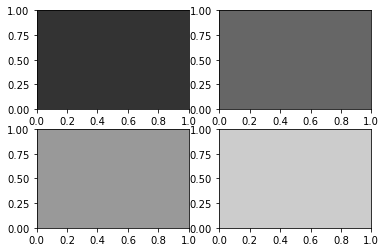

In [8]:
fig, axs = plt.subplots(2, 2)
print(type(axs), axs.shape)
axs[0, 0].set_facecolor('0.2')
axs[0, 1].set_facecolor('0.4')
axs[1, 0].set_facecolor('0.6')
axs[1, 1].set_facecolor('0.8')

By default, size-1 dimensions of the axes array are squeezed out.

<div class="alert alert-info">
    <b>Tip:</b> Tuple unpacking
</div>

Tuple unpacking can be used to assign the returned axes to single variables. Common patterns:

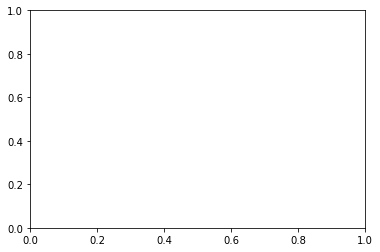

In [9]:
fig, ax = plt.subplots()

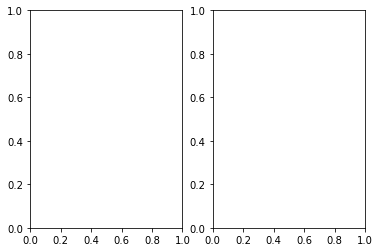

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

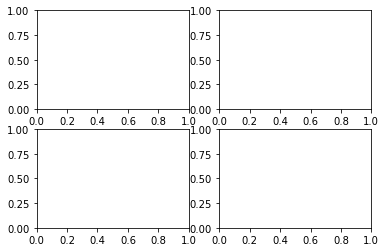

In [11]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)

<div class="alert alert-info">
    <b>Tip:</b> Use axs.flat to iterate over all Axes.
</div>

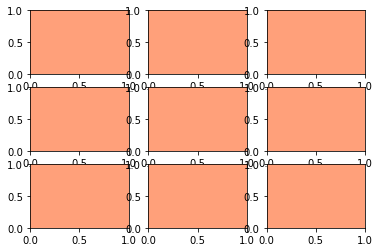

In [12]:
fig, axs = plt.subplots(3, 3)
for ax in axs.flat:
    ax.set_facecolor('lightsalmon')

`plt.subplots(N, M)` suits your needs when all created axes are on a regular grid and should have the same size.

## An irregular grid of plots - `plt.subplot_mosaic(...)`

Inspired by the [patchwork](https://patchwork.data-imaginist.com/) library in R:

- Provide a regular grid of names
- Cells with the same name are merged into one plot
- Use  `None` for empty cells
- Returns a dict, in which the individual `Axes` can be selected by name

See the [subplot_mosaic() tutorial](https://matplotlib.org/stable/tutorials/provisional/mosaic.html) for more information.

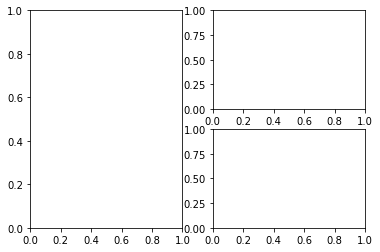

In [13]:
plt.subplot_mosaic([
    ['left', 'right-top'],
    ['left', 'right-bottom'],
]);

(array([ 27.,  74., 111., 104.,  88.,  43.,  33.,  12.,   6.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

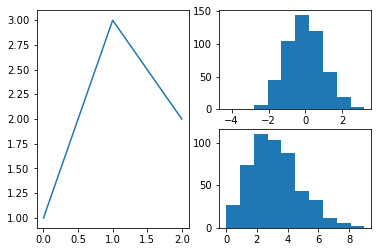

In [16]:
fig, axd = plt.subplot_mosaic([
    ['left', 'right-top'],
    ['left', 'right-bottom'],
])
axd['left'].plot([1, 3, 2])
axd['right-top'].hist(np.random.normal(size=500))
axd['right-bottom'].hist(np.random.poisson(3, size=500))

Tip: As a shortcut you can use a simple string

- Lines -> rows
- Letters -> subplot labels

In [ ]:
plt.subplot_mosaic(
    'AAABB\n'
    'AAACC\n'
    'DDDCC\n');

## More complex layouts

The above are the most important methods, but there is more:

![](images/figure_creation_methods.png)



# Figure size

`figsize = (width, height)` determines the dimensions of the figure in inches.

In [ ]:
fig, ax = plt.subplots()
print('Default size:', fig.get_size_inches())

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

### Excusion: Exact figure size

For pixel-based backends `figsize * dpi` is the actual size in pixels.

Let's make the figure the pysically correct size on the screen.

In [ ]:
resolution = 1920, 1080  # pixels
diagonal = 13.3  # inches

import numpy as np
rx, ry = resolution
dpi = np.sqrt(rx**2 + ry**2) / diagonal
print(dpi)

In [ ]:
fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

Still does not match for the inline backend. :(

The inline backend is trying to be smart and cuts of unused space around the axes ('tight' layout). Let's deactivate that:

In [ ]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

In [ ]:
# reactivate the tight layouting
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

### General recommendation on figure size:

<div class="alert alert-info">
    <b>Tip:</b> Use dpi=100, do not bother with actual figure size.
</div>

Usually it's not worth adjusting the `dpi` to get a physically correct size on the screen, because different screens have different `dpi` and you don't want your plot to be screen depended.

When working with pixel based output (i.e. not svg or pdf), use a fixed `dpi=100` and scale `figsize` as needed. Rule:

   `figsize * dpi = pixels` i.e. `figsize = (6, 4) --> 600x400 pixels`

*Note*: The default is `dpi=100` in matplotlib (since version 2.0). The inline backend still overrides this default with `dpi=72` so that figures in the notebook are smaller by default.

### `figsize` and fonts

Font sizes are in points. They are not affected by `figsize`.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20)

## Layouting: Constrained Layout


In [ ]:
x = np.linspace(0, 2, 201)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, x)
ax2.plot(x, 1000*x**2)
ax1.set_title('Function: x')
ax2.set_title('Function: $x^2$')
ax1.set_ylabel('The y label')
ax2.set_ylabel('The y label')

Layouting a figure is hard: Need to size and position elements such that they don't overlap.

Matplotlib used to have a simple layouter (`plt.tight_layout()` or `fig.tight_layout()`).

### New since Matplotlib 3.0: Constrained Layout

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
ax1.plot(x, x)
ax2.plot(x, 1000*x**2)
ax1.set_title('Function: x')
ax2.set_title('Function: $x^2$')
ax1.set_ylabel('The y label')
ax2.set_ylabel('The y label')